In [1]:
#importing libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv("/content/health_fitness_dataset.csv")

In [3]:
data.head()

,ID,Age,Gender,Height (cm),Weight (kg),BMI,Steps per Day,Hours of Exercise per Week,Diet Quality Score,Chronic Conditions
0,1,62,Female,166.0,62.0,26.0,12656,6.3,7,NaN
1,2,65,Female,182.0,61.0,26.0,11658,5.7,8,Hypertension
2,3,18,Female,NaN,NaN,27.0,19021,NaN,10,Diabetes
3,4,21,Female,176.0,70.0,23.0,6652,7.2,4,Diabetes
4,5,21,Male,171.0,81.0,25.0,12091,3.9,3,Heart Disease


In [4]:
# to know about data, we do some summarise steps
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          3000 non-null   int64  
 1   Age                         3000 non-null   int64  
 2   Gender                      3000 non-null   object 
 3   Height (cm)                 2700 non-null   float64
 4   Weight (kg)                 2700 non-null   float64
 5   BMI                         3000 non-null   float64
 6   Steps per Day               3000 non-null   int64  
 7   Hours of Exercise per Week  2700 non-null   float64
 8   Diet Quality Score          3000 non-null   int64  
 9   Chronic Conditions          2226 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 234.5+ KB


In [5]:
data.describe()

,ID,Age,Height (cm),Weight (kg),BMI,Steps per Day,Hours of Exercise per Week,Diet Quality Score
count,3000.000000,3000.000000,2700.000000,2700.000000,3000.000000,3000.000000,2700.000000,3000.000000
mean,1500.500000,43.505000,170.088148,70.113333,24.031667,10438.454667,4.966556,5.544333
std,866.169729,15.048459,9.939592,15.253585,4.000166,5468.735284,2.895332,2.857987
min,1.000000,18.000000,140.000000,11.000000,12.000000,1000.000000,0.000000,1.000000
25%,750.750000,30.000000,163.000000,60.000000,21.000000,5726.500000,2.400000,3.000000
50%,1500.500000,44.000000,170.000000,70.000000,24.000000,10410.000000,4.900000,6.000000
75%,2250.250000,56.000000,177.000000,81.000000,27.000000,15094.500000,7.500000,8.000000
max,3000.000000,69.000000,203.000000,130.000000,39.000000,19991.000000,10.000000,10.000000


In [6]:
#I can see ID as unwanted column, so we can remove it
data.drop('ID',axis=1,inplace=True)

In [10]:
#converting categorical data
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Chronic Conditions'] = data['Chronic Conditions'].astype('category').cat.codes

In [11]:
data.isnull().sum()


,0
Age,0
Gender,0
Height (cm),300
Weight (kg),300
BMI,0
Steps per Day,0
Hours of Exercise per Week,300
Diet Quality Score,0
Chronic Conditions,0


In [12]:
#impute missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [14]:
data_imputed.isnull().sum()

,0
Age,0
Gender,0
Height (cm),0
Weight (kg),0
BMI,0
Steps per Day,0
Hours of Exercise per Week,0
Diet Quality Score,0
Chronic Conditions,0


In [15]:
data_imputed.drop_duplicates(inplace=True)

In [16]:
#Normalizing features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data.columns)


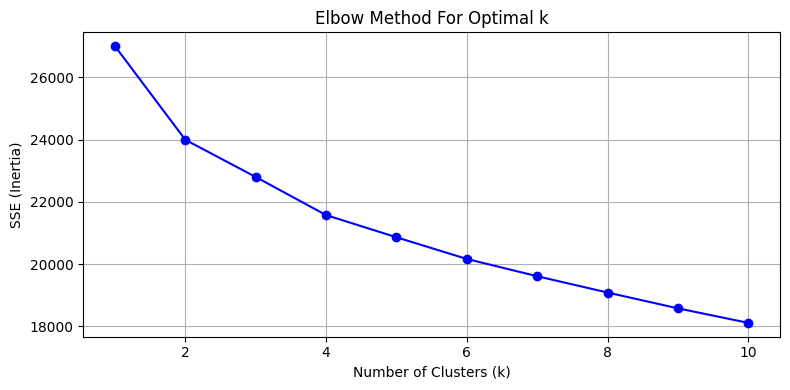

In [19]:
#Elbow Method to find optimal k
from sklearn.cluster import KMeans
sse = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, sse, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
#from above we can say that k=4 is the optimal
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
data_scaled['Cluster'] = kmeans.fit_predict(data_scaled)


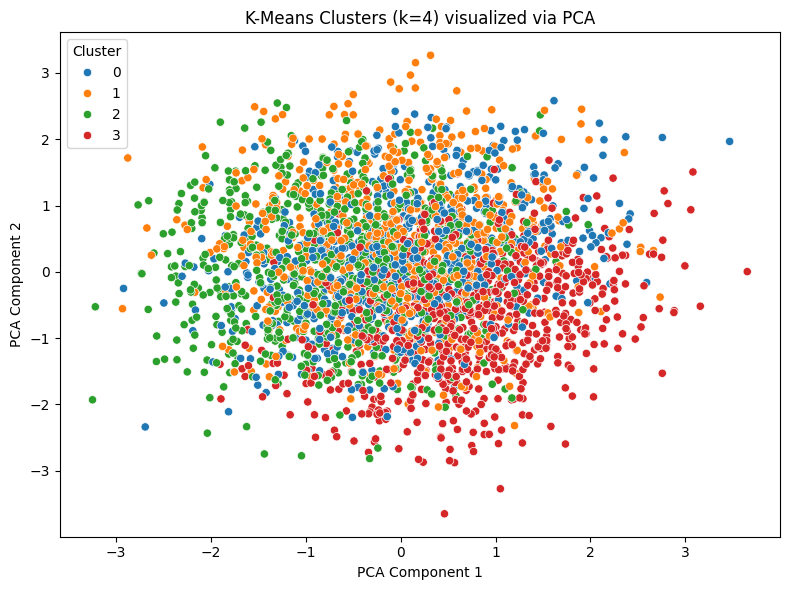

In [22]:
# Visualizing clusters using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(data_scaled.drop(columns=['Cluster']))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=data_scaled['Cluster'], palette='tab10')
plt.title('K-Means Clusters (k=4) visualized via PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [24]:
# Analyzing cluster characteristics
data_imputed['Cluster'] = data_scaled['Cluster']
cluster_summary = data_imputed.groupby('Cluster').mean()
cluster_summary

,Age,Gender,Height (cm),Weight (kg),BMI,Steps per Day,Hours of Exercise per Week,Diet Quality Score,Chronic Conditions
Cluster,,,,,,,,,
0,30.156809,1.0,169.951322,70.451857,24.229711,10317.651994,4.628737,5.392022,0.409904
1,43.157025,0.0,170.637369,69.799403,24.213499,10613.761708,5.033094,5.628099,1.511019
2,43.432570,0.0,169.687762,70.723596,24.054707,10296.814249,5.016061,5.268448,-0.503817
3,56.663601,1.0,170.108440,69.459115,23.645204,10532.909330,5.174672,5.894875,0.583443


from matplotlib import pyplot as plt
_df_0['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Height (cm)'].plot(kind='hist', bins=20, title='Height (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Cluster', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Age', y='Gender', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Gender', y='Height (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Height (cm)', y='Weight (kg)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Cluster']
  ys = series['Gender']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Cluster', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cluster')
_ = plt.ylabel('Gender')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Cluster']
  ys = series['Height (cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Cluster', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cluster')
_ = plt.ylabel('Height (cm)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Cluster']
  ys = series['Weight (kg)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Cluster', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cluster')
_ = plt.ylabel('Weight (kg)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Cluster']
  ys = series['BMI']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Cluster', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cluster')
_ = plt.ylabel('BMI')

from matplotlib import pyplot as plt
_df_12['Cluster'].plot(kind='line', figsize=(8, 4), title='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Gender'].plot(kind='line', figsize=(8, 4), title='Gender')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Height (cm)'].plot(kind='line', figsize=(8, 4), title='Height (cm)')
plt.gca().spines[['top', 'right']].set_visible(False)